In [10]:
import time

while True:
  time.sleep(10)

KeyboardInterrupt: ignored

In [11]:
!unzip USL.zip -d USL

Показано результат, скорочений до останніх рядків (5000).
 extracting: USL/USL/5/o_1084.jpg    
 extracting: USL/USL/5/o_1085.jpg    
 extracting: USL/USL/5/o_1086.jpg    
 extracting: USL/USL/5/o_1087.jpg    
 extracting: USL/USL/5/o_1088.jpg    
 extracting: USL/USL/5/o_1089.jpg    
 extracting: USL/USL/5/o_109.jpg     
 extracting: USL/USL/5/o_1090.jpg    
 extracting: USL/USL/5/o_1091.jpg    
 extracting: USL/USL/5/o_1092.jpg    
 extracting: USL/USL/5/o_1093.jpg    
 extracting: USL/USL/5/o_1094.jpg    
 extracting: USL/USL/5/o_1095.jpg    
 extracting: USL/USL/5/o_1096.jpg    
 extracting: USL/USL/5/o_1097.jpg    
 extracting: USL/USL/5/o_1098.jpg    
 extracting: USL/USL/5/o_1099.jpg    
 extracting: USL/USL/5/o_11.jpg      
 extracting: USL/USL/5/o_110.jpg     
 extracting: USL/USL/5/o_1100.jpg    
 extracting: USL/USL/5/o_1101.jpg    
 extracting: USL/USL/5/o_1102.jpg    
 extracting: USL/USL/5/o_1103.jpg    
 extracting: USL/USL/5/o_1104.jpg    
 extracting: USL/USL/5/o_1105.

In [2]:
!python -m pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 50.8 MB/s eta 0:00:00


In [3]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

In [4]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

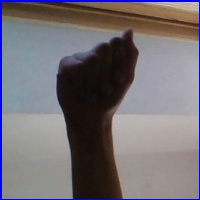

In [12]:
!wget -q -O image.jpg https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/woman_hands.jpg

import cv2
from google.colab.patches import cv2_imshow
path_to_images = "USL/USL/"
img = cv2.imread(path_to_images + "0/A1.jpg")
cv2_imshow(img)

In [31]:
from PIL import Image

im = Image.open(path_to_images + "0/A1.jpg") 
pix = np.array(im)
pix.shape

(200, 200, 3)

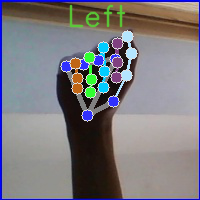

In [32]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
# image = mp.Image.create_from_file(path_to_images + "0/a_1.jpg")
image = mp.Image(image_format=mp.ImageFormat.GRAY8, data=pix)
# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [45]:
detection_result.hand_landmarks[0][0]

NormalizedLandmark(x=0.42136070132255554, y=0.6626638770103455, z=-3.605165233011576e-08, visibility=0.0, presence=0.0)

In [ ]:
mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)

In [21]:
path_to_images 

'USL/USL/'

In [41]:
import csv
import os

In [28]:
with open('usl_table.csv', 'a+') as file:
  writer = csv.writer(file)
  writer.writerow(['ine', 'two'])
  writer.writerow(['two']) 

In [47]:
# Iterate through dirs
for letter_dir in os.listdir(path_to_images):
    print(letter_dir + ' out of 29 letters')
    row_int = int(letter_dir)
    for img in os.listdir(path_to_images + r'/' + letter_dir):
        img_path = path_to_images + r'/' + letter_dir + r'/' + img
        
        im = Image.open(img_path) 
        pix = np.array(im)
        
        if len(pix.shape) == 3:
          image = mp.Image(image_format=mp.ImageFormat.SRGB, data=pix)
        elif len(pix.shape) == 2:
          image = mp.Image(image_format=mp.ImageFormat.GRAY8, data=pix)

        if image:
          detection_result = detector.detect(image)
          if detection_result.hand_landmarks:
            row = [row_int]
            for landmark in detection_result.hand_landmarks[0]:
              row.append(landmark.x)
              row.append(landmark.y)

            with open('usl_data.csv', 'a+') as file:
              writer = csv.writer(file)
              writer.writerow(row)


13 out of 29 letters
7 out of 29 letters
28 out of 29 letters
21 out of 29 letters
29 out of 29 letters
3 out of 29 letters
10 out of 29 letters
1 out of 29 letters
19 out of 29 letters
15 out of 29 letters
0 out of 29 letters
17 out of 29 letters
8 out of 29 letters
24 out of 29 letters
6 out of 29 letters
18 out of 29 letters
20 out of 29 letters
11 out of 29 letters
12 out of 29 letters
9 out of 29 letters
4 out of 29 letters
2 out of 29 letters
26 out of 29 letters
27 out of 29 letters
25 out of 29 letters
5 out of 29 letters
16 out of 29 letters
23 out of 29 letters
14 out of 29 letters
22 out of 29 letters


In [48]:
import numpy as np

In [51]:
from numpy import genfromtxt
my_data = genfromtxt('usl_data.csv', delimiter=',')

In [52]:
my_data.shape

(31648, 43)

In [53]:
y = my_data[:,0]

In [54]:
y

array([13., 13., 13., ..., 22., 22., 22.])

In [59]:
np.unique(y).shape

(27,)

In [55]:
xs = my_data[:, 1:]

In [57]:
xs[0][0]

0.42136070132255554

In [58]:
import tensorflow as tf

In [100]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(42,)))

model.add(tf.keras.layers.Dense(42, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='softmax'))

In [101]:
model.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='Best_weights.h5',
                                                 save_weights_only=True,
                                                 verbose=1)

In [66]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import MultiLabelBinarizer
def generate_class_weights(class_series, multi_class=True, one_hot_encoded=False):
  if multi_class:
    # If class is one hot encoded, transform to categorical labels to use compute_class_weight   
    if one_hot_encoded:
      class_series = np.argmax(class_series, axis=1)
  
    # Compute class weights with sklearn method
    class_labels = np.unique(class_series)
    class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=class_series)
    return dict(zip(class_labels, class_weights))
  else:
    # It is neccessary that the multi-label values are one-hot encoded
    mlb = None
    if not one_hot_encoded:
      mlb = MultiLabelBinarizer()
      class_series = mlb.fit_transform(class_series)

    n_samples = len(class_series)
    n_classes = len(class_series[0])

    # Count each class frequency
    class_count = [0] * n_classes
    for classes in class_series:
        for index in range(n_classes):
            if classes[index] != 0:
                class_count[index] += 1
    
    # Compute class weights using balanced method
    class_weights = [n_samples / (n_classes * freq) if freq > 0 else 1 for freq in class_count]
    class_labels = range(len(class_weights)) if mlb is None else mlb.classes_
    return dict(zip(class_labels, class_weights))

In [68]:
class_weights = generate_class_weights(y)

In [70]:
class_weights

{0.0: 0.36099419407088024,
 1.0: 0.49436868331849354,
 2.0: 3.0765043258481577,
 3.0: 41.86243386243386,
 4.0: 39.071604938271605,
 5.0: 0.3588941053729786,
 6.0: 3.9868984630889392,
 7.0: 4.201247842824904,
 10.0: 0.34044384204128614,
 12.0: 4.423200559049616,
 13.0: 1.3155422538138588,
 14.0: 11.27065527065527,
 15.0: 0.807820915332976,
 16.0: 4.186243386243386,
 17.0: 48.839506172839506,
 18.0: 40.41890166028097,
 19.0: 0.42951562775674174,
 20.0: 39.071604938271605,
 21.0: 0.45840756673764105,
 22.0: 15.423001949317738,
 23.0: 0.5495303085551562,
 24.0: 0.4681102828067684,
 25.0: 41.86243386243386,
 26.0: 5.14100064977258,
 27.0: 35.519640852974184,
 28.0: 0.46979885697320567,
 29.0: 0.47803758081082715}

In [71]:
class_weights[8.] = 0
class_weights[9.] = 0
class_weights[11.] = 0

In [73]:
y = tf.keras.utils.to_categorical(y, 30)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.33, random_state=42)

In [ ]:
model.fit(
    x=X_train, y=y_train,
    validation_data=(X_test, y_test),
    batch_size=2,
    epochs=50, 
    class_weight=class_weights, 
    callbacks=[cp_callback]
)

Epoch 1/50
10594/10602 [============================>.] - ETA: 0s - loss: 2.6356 - accuracy: 0.2400
Epoch 1: saving model to Best_weights.h5
10602/10602 [==============================] - 46s 4ms/step - loss: 2.6341 - accuracy: 0.2402 - val_loss: 1.3911 - val_accuracy: 0.5811
Epoch 2/50
10602/10602 [==============================] - ETA: 0s - loss: 1.5461 - accuracy: 0.5152
Epoch 2: saving model to Best_weights.h5
10602/10602 [==============================] - 45s 4ms/step - loss: 1.5461 - accuracy: 0.5152 - val_loss: 0.9296 - val_accuracy: 0.7523
Epoch 3/50
10598/10602 [============================>.] - ETA: 0s - loss: 1.1501 - accuracy: 0.6250
Epoch 3: saving model to Best_weights.h5
10602/10602 [==============================] - 45s 4ms/step - loss: 1.1500 - accuracy: 0.6249 - val_loss: 1.1069 - val_accuracy: 0.6519
Epoch 4/50
10588/10602 [============================>.] - ETA: 0s - loss: 1.0365 - accuracy: 0.6572
Epoch 4: saving model to Best_weights.h5
10602/10602 [===============